# Differential Calculus
### Differential calculus is a methodology to study how things change
## What changes in biomedicine?

## Motivation: Drug Concentration

The following example is taken from *Mathematics for the Life Sciences* 

A simple mathematical model of a blood serum drug concentration is

$$
y=Ae^{-kt}
$$

Where $y$ is the drug cocentration, $A$ is the initial dose of the drug at time $t=0$, and $k$ is a *rate constant* that describes how rapidly the concentration changes.

Concetration changes because the drug might be metabolized by the liver (or other organ), is cleared from the blood and removed in the urine by the kidneys, etc.

### Example:

Assuming for ibuprofen an initial dose of 200 mg and a rate constant of 0.35, plot the concentration curve vs time.

### We are going to introduce another third-party Python package, [Sympy](http://docs.sympy.org/latest/index.html)

In [2]:
%matplotlib inline
from sympy import symbols
from sympy.plotting import plot
import math

#### ``symbols`` will allow us to create symbolic variables 

In [3]:
t = symbols('t')

#### We can now plot an expression that is a function of ``t`` vs a range of values for ``t``.

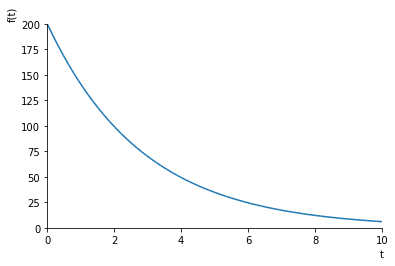

In [4]:
A = 200
k = 0.35
b = 0.46
plot(A*math.e**(-k*t), (t,0, 10))

#### Note that the above expression is equivalent to the expression plotted below:

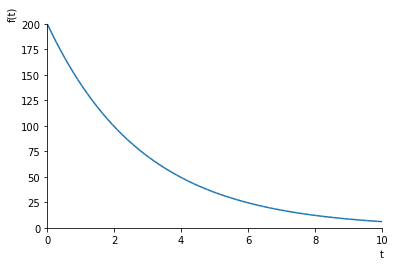

In [5]:
from sympy.functions import exp
plot(A*exp(-k*t), (t,0, 10))

### A more sophisticated drug clearance model accounts for the fact that an oral dose has to be absorbed by the digestive system

$$
y = \frac{Ab}{b-k}\left(e^{-kt}-e^{-bt}\right)
$$

where we have added the parameter $b$ which is the clearance rate for the digestive system and typically $b > k$.

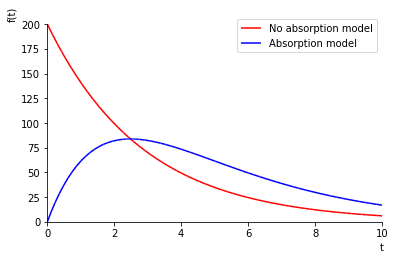

In [6]:
b = 0.46
p = plot( A*exp(-k*t), A*b/(b-k)*(exp(-k*t)-exp(-b*t)), (t, 0, 10), 
          show=False, legend=True)
p[0].line_color = 'r'
p[1].line_color = 'b'
p[0].label = "No absorption model"
p[1].label = 'Absorption model'
p.show()

>Medication regimens for multiple doses are designed so that the minimum level (just before a dose) is high enough to be therapeutic and the maximum level (just after a dose) is not high enough to be toxic.
>
>Suppose a person has been taking 650- mg doses of acetaminophen every 4 h for several days. This will result in a drug versus time curve that repeats over a period of 4 h. Let A be the unknown concentration immediately after taking a dose. 

## What are some questions we might ask?
1. What is the concentration after 4 hours?
1. With the absorption model, what time is the dose maximum?

## Consider question 2 in more detail
### What does the maximum point look like?

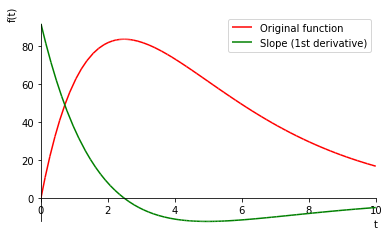

In [7]:
from sympy import diff
model2 = A*b/(b-k)*(exp(-k*t)-exp(-b*t))
p = plot(model2, diff(model2), (t, 0, 10), show=False, legend=True)
p[0].line_color = 'r'
p[0].label = 'Original function'
p[1].line_color = 'g'
p[1].label = 'Slope (1st derivative)'
p.show()

## Special Functions Defined in Sympy

In [8]:
import sympy.functions as funcs

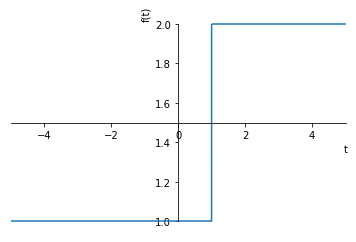

In [9]:
plot(funcs.Heaviside(t-1)+1, (t, -5, 5))

### How could we use the Heaviside function to model multiple doses?

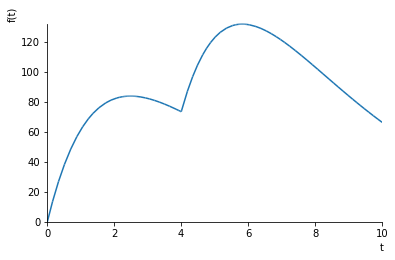

In [10]:
T=4
plot(A*b/(b-k)*(exp(-k*t)-exp(-b*t))+funcs.Heaviside(t-4)*A*b/(b-k)*(exp(-k*(t-T))-exp(-b*(t-T))), (t, 0, 10))

In [11]:
def oral_dosing(A, b, k, t, T=0):
    return funcs.Heaviside(t-T)*(A*b/(b-k))*(exp(-k*(t-T))-exp(-b*(t-T)))
                                           

In [12]:
def sum_dosing(A, b, k, t, T=0, N=6):


SyntaxError: unexpected EOF while parsing (<ipython-input-12-5a11e72ff509>, line 1)

In [ ]:
plot(oral_dosing(A, b, k, t)+\
     oral_dosing(A, b, k, t, T=4)+\
     oral_dosing(A, b, k, t, T=8), (t, -10, 24))

In [14]:
def dosing(A, b, k, t, T=[0, 4, 8, 12, 16, 20, 24]):
    
    dt = T[0]
    dose = oral_dosing(A, b, k, t, T=dt)
    for dt in T[1:]:
        dose += oral_dosing(A, b, k, t, T=dt)
    return dose


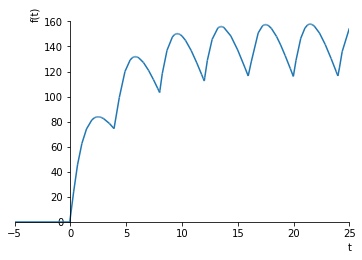

In [15]:
plot(dosing(A, b, k, t), (t, -5, 25))

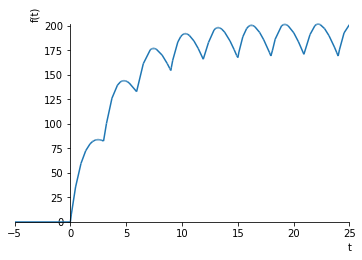

In [16]:
plot(dosing(A, b, k, t, T=range(0,25, 3)), (t, -5, 25))

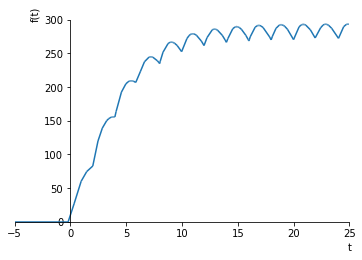

In [17]:
plot(dosing(A, b, k, t, T=range(0,25, 2)), (t, -5, 25))

## Derivatives of Common Functions

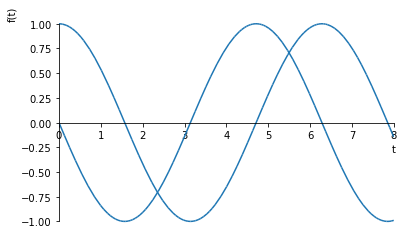

In [13]:
plot(funcs.cos(t), diff(funcs.cos(t)), (t, 0, 8))